In [1]:
# Dependencies
# Set up imports
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
from pathlib import Path



In [2]:
# Import CSV
filepath = "Resources/student_health_data.csv"
df1 = pd.read_csv(filepath)

# Check it
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student_ID                1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Heart_Rate                1000 non-null   float64
 4   Blood_Pressure_Systolic   1000 non-null   float64
 5   Blood_Pressure_Diastolic  1000 non-null   float64
 6   Stress_Level_Biosensor    1000 non-null   float64
 7   Stress_Level_Self_Report  1000 non-null   float64
 8   Physical_Activity         1000 non-null   object 
 9   Sleep_Quality             1000 non-null   object 
 10  Mood                      1000 non-null   object 
 11  Study_Hours               1000 non-null   float64
 12  Project_Hours             1000 non-null   float64
 13  Health_Risk_Level         1000 non-null   object 
dtypes: float6

In [3]:
#Reading file
df1.head()

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate
1,2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate
2,3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate


In [3]:
#Converting float to integer values
df2 = df1
# lets make integers
df2["Blood_Pressure_Systolic"] = df2["Blood_Pressure_Systolic"].astype("int")
df2["Heart_Rate"] = df2["Heart_Rate"].astype("int")
df2["Blood_Pressure_Diastolic"] = df2["Blood_Pressure_Diastolic"].astype("int")
df2["Stress_Level_Biosensor"] = df2["Stress_Level_Biosensor"].astype("int")
df2["Stress_Level_Self_Report"] = df2["Stress_Level_Self_Report"].astype("int")
df2["Study_Hours"] = df2["Study_Hours"].astype("int")
df2["Project_Hours"] = df2["Project_Hours"].astype("int")
df2.head(90)

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,1,24,M,50,122,84,3,9,High,Moderate,Happy,34,16,Moderate
1,2,21,F,57,110,75,3,5,Moderate,Good,Stressed,16,15,Moderate
2,3,22,M,59,109,83,6,5,Low,Moderate,Happy,44,25,Moderate
3,4,24,M,76,125,78,6,6,High,Poor,Happy,21,20,High
4,5,20,M,68,107,80,7,4,Moderate,Poor,Happy,8,15,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,19,F,55,123,70,2,2,Moderate,Good,Neutral,35,16,Low
86,87,21,M,71,116,89,7,1,High,Good,Stressed,24,11,Moderate
87,88,23,M,74,138,90,5,8,Moderate,Good,Happy,17,19,Moderate
88,89,22,F,68,104,69,2,3,High,Moderate,Neutral,20,11,Low


In [4]:
# Count the number of students in each Sleep_Quality category
Physical_Activity_counts = df2["Physical_Activity"].value_counts().reset_index()
Physical_Activity_counts.columns = ["Physical_Activity", "Count"]
print(Physical_Activity_counts)

  Physical_Activity  Count
0          Moderate    491
1               Low    302
2              High    207


In [5]:
# Count the number of students in each Sleep_Quality category
Mood_counts = df2["Mood"].value_counts().reset_index()
Mood_counts.columns = ["Mood", "Count"]
print(Mood_counts)

       Mood  Count
0   Neutral    415
1     Happy    399
2  Stressed    186


In [6]:
# Count the number of students in each Sleep_Quality category
sleep_quality_counts = df1["Sleep_Quality"].value_counts().reset_index()
sleep_quality_counts.columns = ["Sleep_Quality", "Count"]
print(sleep_quality_counts)

  Sleep_Quality  Count
0          Good    473
1      Moderate    317
2          Poor    210


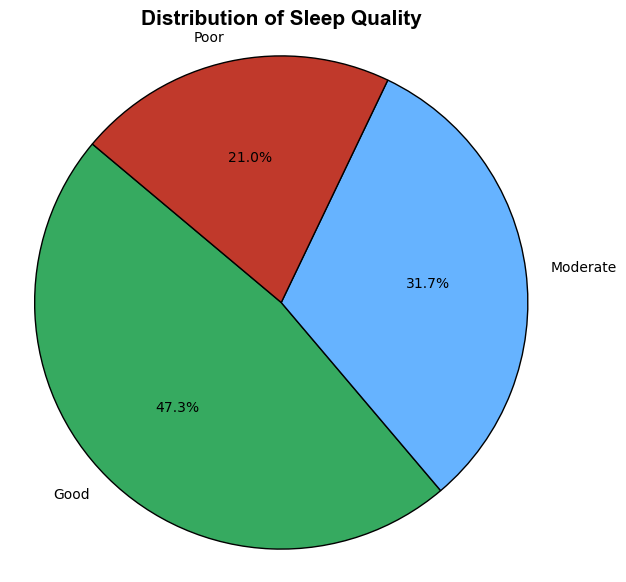

In [7]:
# Data: Sleep Quality and corresponding student count
labels = ['Good', 'Moderate', 'Poor']
sizes = [473, 317, 210]
colors = ["#36AA60", '#66b3ff', '#c0392b']  # Optional: Customize the colors

# Create Pie Chart
plt.figure(figsize=(7, 7))  # Optional: Set figure size
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Add Title
plt.title("Distribution of Sleep Quality", family="Arial", fontsize=15, fontweight="bold")

# Display the chart
plt.axis('equal') 
plt.savefig('Sleepquality.png')
plt.show()

In [8]:
# Set custom category order for Sleep Quality
sleep_order = ['Good', 'Moderate', 'Poor']
df1['Sleep_Quality'] = pd.Categorical(df1['Sleep_Quality'], categories=sleep_order, ordered=True)

# Sort the DataFrame by Sleep Quality
sleep_quality_sorted_df1 = df1.sort_values('Sleep_Quality')

# Display sorted DataFrame to ensure data is sorted
sleep_quality_sorted_df1.head()

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
999,1000,23,F,64,109,76,6,7,Moderate,Good,Happy,30,20,Moderate
380,381,20,M,67,109,71,1,6,Low,Good,Happy,36,17,Moderate
748,749,23,M,72,127,93,9,2,Moderate,Good,Happy,23,14,Moderate
378,379,21,M,81,129,86,9,9,Low,Good,Neutral,43,11,High
377,378,18,M,57,116,69,4,9,Moderate,Good,Happy,29,20,Moderate


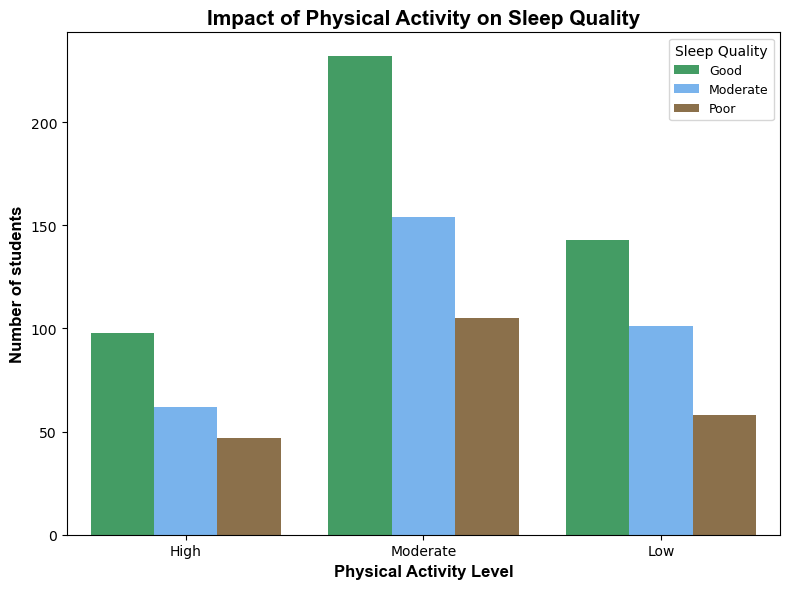

In [9]:
#Now comparing "physical actiivty" with "Sleep quality"
#Define a custom color palette for 'Sleep_Quality' categories
custom_palette = ["#36AA60",'#66b3ff', "#967240"]  

# Create the bar plot with the custom palette
plt.figure(figsize=(8, 6))
sns.countplot(data=df2, x="Physical_Activity", hue="Sleep_Quality", palette=custom_palette) #dataframe is df2 because we are not using the sorted sleep quality one

# Add titles and labels
plt.title("Impact of Physical Activity on Sleep Quality", family="Arial", fontsize=15, fontweight="bold")
plt.xlabel("Physical Activity Level", family="Arial", fontsize=12, fontweight="bold")
plt.ylabel("Number of students", family="Arial", fontsize=12,fontweight="bold")

# Customize the legend
plt.legend(title="Sleep Quality", title_fontsize=10, loc="upper right", fontsize=9)

# Show the plot
plt.tight_layout()
plt.savefig('Physicalactivity_Sleepquality.png')
plt.show()


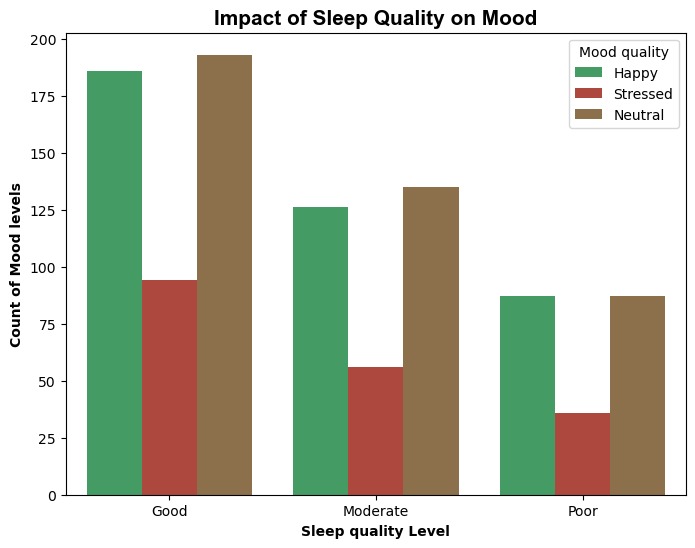

In [10]:
# comparing sleep quality with Mood
#Create a bar plot
plt.figure(figsize=(8, 6))
# Define a custom color palette for 'Sleep_Quality' categories
custom_palette = ["#36AA60", "#c0392b", "#967240"]  
sns.countplot(data=df2, x="Sleep_Quality", hue="Mood",palette=custom_palette)
plt.title("Impact of Sleep Quality on Mood",family="Arial", fontsize=15,fontweight="bold")
plt.xlabel("Sleep quality Level", fontweight="bold")
plt.ylabel("Count of Mood levels", fontweight="bold")
plt.legend(title="Mood quality")
plt.savefig('Sleepquality_Mood.png')
plt.show()

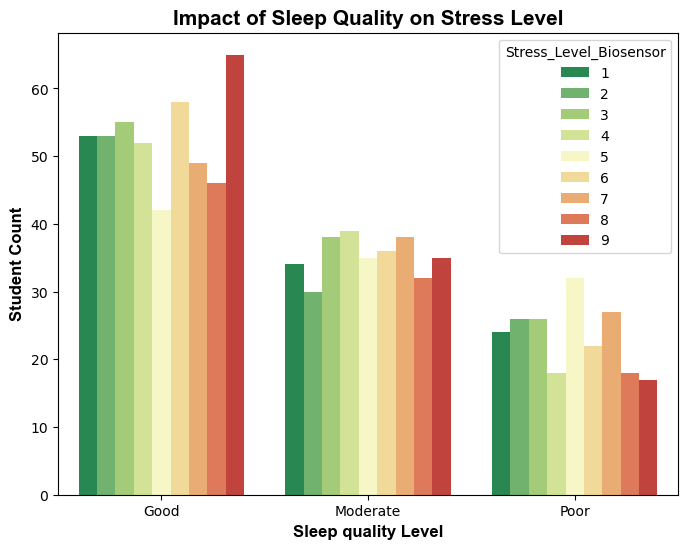

In [11]:
#Comparing sleep quality with Stress level measured by biosensor, green is considered low and red is high
color_palette = sns.color_palette("RdYlGn_r", n_colors=len(df2["Stress_Level_Biosensor"].unique()))
# Create the bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df2, x="Sleep_Quality", hue="Stress_Level_Biosensor", palette = color_palette)
plt.title("Impact of Sleep Quality on Stress Level", family="Arial", fontsize=15,fontweight="bold")
plt.xlabel("Sleep quality Level",family="Arial", fontsize=12,fontweight="bold")
plt.ylabel("Student Count",family="Arial", fontsize=12,fontweight="bold")
plt.savefig('Sleepquality_Stresslevel.png')
plt.show()

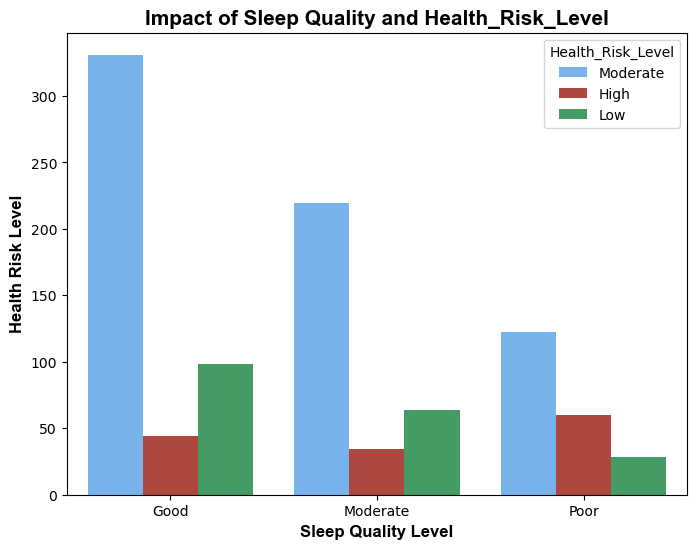

In [12]:
custom_palette = ["#66b3ff", '#c0392b', "#36AA60"] 
# Create the bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df2, x="Sleep_Quality", hue="Health_Risk_Level", palette = custom_palette)
plt.title("Impact of Sleep Quality and Health_Risk_Level", family="Arial", fontsize=15,fontweight="bold")
plt.xlabel("Sleep Quality Level",family="Arial", fontsize=12,fontweight="bold")
plt.ylabel("Health Risk Level",family="Arial", fontsize=12,fontweight="bold")
plt.savefig('Impact of Sleep Quality and Health_Risk_Level.png')
plt.show()